In [1]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
# loan characteristics
original_balance = 500000
coupon = 0.08
term = 120

# payments
periods = range(1, term+1)
interest_payment = npf.ipmt(
    rate=coupon / 12, per=periods, nper=term, pv=-original_balance)
principal_payment = npf.ppmt(
    rate=coupon / 12, per=periods, nper=term, pv=-original_balance)

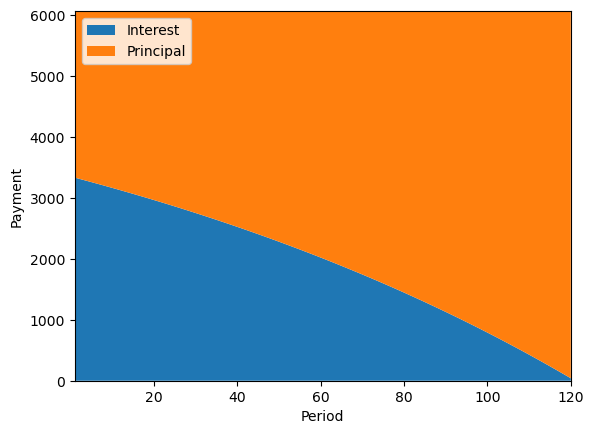

In [3]:
plt.stackplot(periods, interest_payment, principal_payment, 
              labels=['Interest', 'Principal'])
plt.legend(loc='upper left')
plt.xlabel("Period")
plt.ylabel("Payment")
plt.margins(0, 0)

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# cash flow table_
cf_data = {'Interest': interest_payment, 'Principal': principal_payment}
cf_table = pd.DataFrame(data=cf_data, index=periods)
cf_table['Payment'] = cf_table['Interest'] + cf_table['Principal']
cf_table['Ending Balance'] = original_balance - \
                             cf_table['Principal'].cumsum()
cf_table['Beginning Balance'] = [original_balance] + \
                                list(cf_table['Ending Balance'])[:-1]
cf_table = cf_table[['Beginning Balance', 'Payment', 'Interest', 
                     'Principal', 'Ending Balance']]
cf_table.head(8)

,Beginning Balance,Payment,Interest,Principal,Ending Balance
1,"500,000.00","6,066.38","3,333.33","2,733.05","497,266.95"
2,"497,266.95","6,066.38","3,315.11","2,751.27","494,515.69"
3,"494,515.69","6,066.38","3,296.77","2,769.61","491,746.08"
4,"491,746.08","6,066.38","3,278.31","2,788.07","488,958.01"
5,"488,958.01","6,066.38","3,259.72","2,806.66","486,151.35"
6,"486,151.35","6,066.38","3,241.01","2,825.37","483,325.98"
7,"483,325.98","6,066.38","3,222.17","2,844.21","480,481.77"
8,"480,481.77","6,066.38","3,203.21","2,863.17","477,618.60"
